# Module 2: EDA Ready to use dataset

In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('groceries_datasets2/raw/feature_frame.csv')
dataset.info()
dataset.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
2441087,33719435788420,haircare,2926432682116,3487992971396,2021-02-20 10:41:47,2021-02-20 00:00:00,8,0.0,0.0,0.0,...,0.0,0.0,1.0,5.0,33.0,34.5,51.264022,77.0,32.0,28.189363
1167578,34221708247172,dishwasherdetergent,2913137197188,3812965056644,2021-02-03 19:22:13,2021-02-03 00:00:00,7,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,33.0,36.0,21.595392,20.0,32.0,25.841947
973614,34284955402372,wipescottonwool,3638755000452,3869957292164,2021-02-25 09:58:37,2021-02-25 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,35.0,22.234037,30.0,34.0,27.826713
1419634,33826460008580,ricepastapulses,2833910923396,3780814897284,2020-11-07 11:19:31,2020-11-07 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,38.0,28.432376,30.0,30.0,24.276180
648351,33667184492676,juicesquash,2919373340804,3767028908164,2021-02-11 13:04:57,2021-02-11 00:00:00,6,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,64.0,28.198095,30.0,27.0,25.876853


First, I check that there are no nulls in the dataset.

In [2]:
dataset.isnull().sum()

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

 Check that there is no mixing of data types in the columns of the dataset.

In [3]:
for column in dataset.columns:
    mixed_types = dataset[column].apply(type).nunique() > 1
    if mixed_types:
        print(f"Column '{column}' has mixed type data.")


Then I analyse what kind of variables are in the dataset

In [4]:
info_cols = ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date']
label_col = 'outcome'
features_cols = [col for col in dataset.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

I analyse the outputs and I find that this is a highly unbalanced dataset.

In [5]:
dataset[label_col].value_counts()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

Analyse cardinality of categorical variables

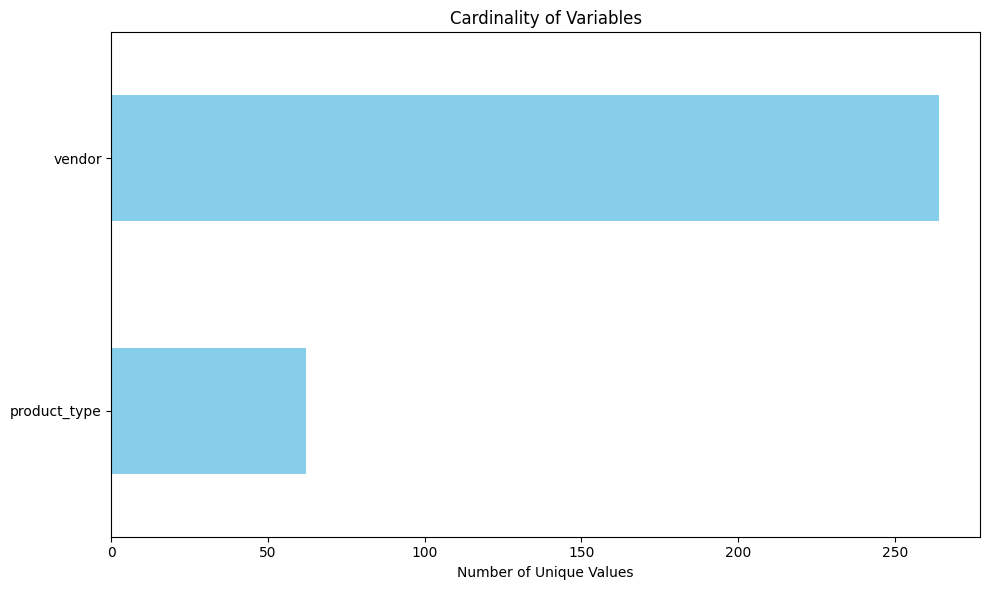

In [ ]:
cardinality = dataset[categorical_cols].nunique().sort_values()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cardinality.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Unique Values")
plt.title("Cardinality of Variables")
plt.tight_layout()
plt.show()

As the cardinality is very high we will have to use frequency or target encoding.

Analyse the distribution of numerical variables

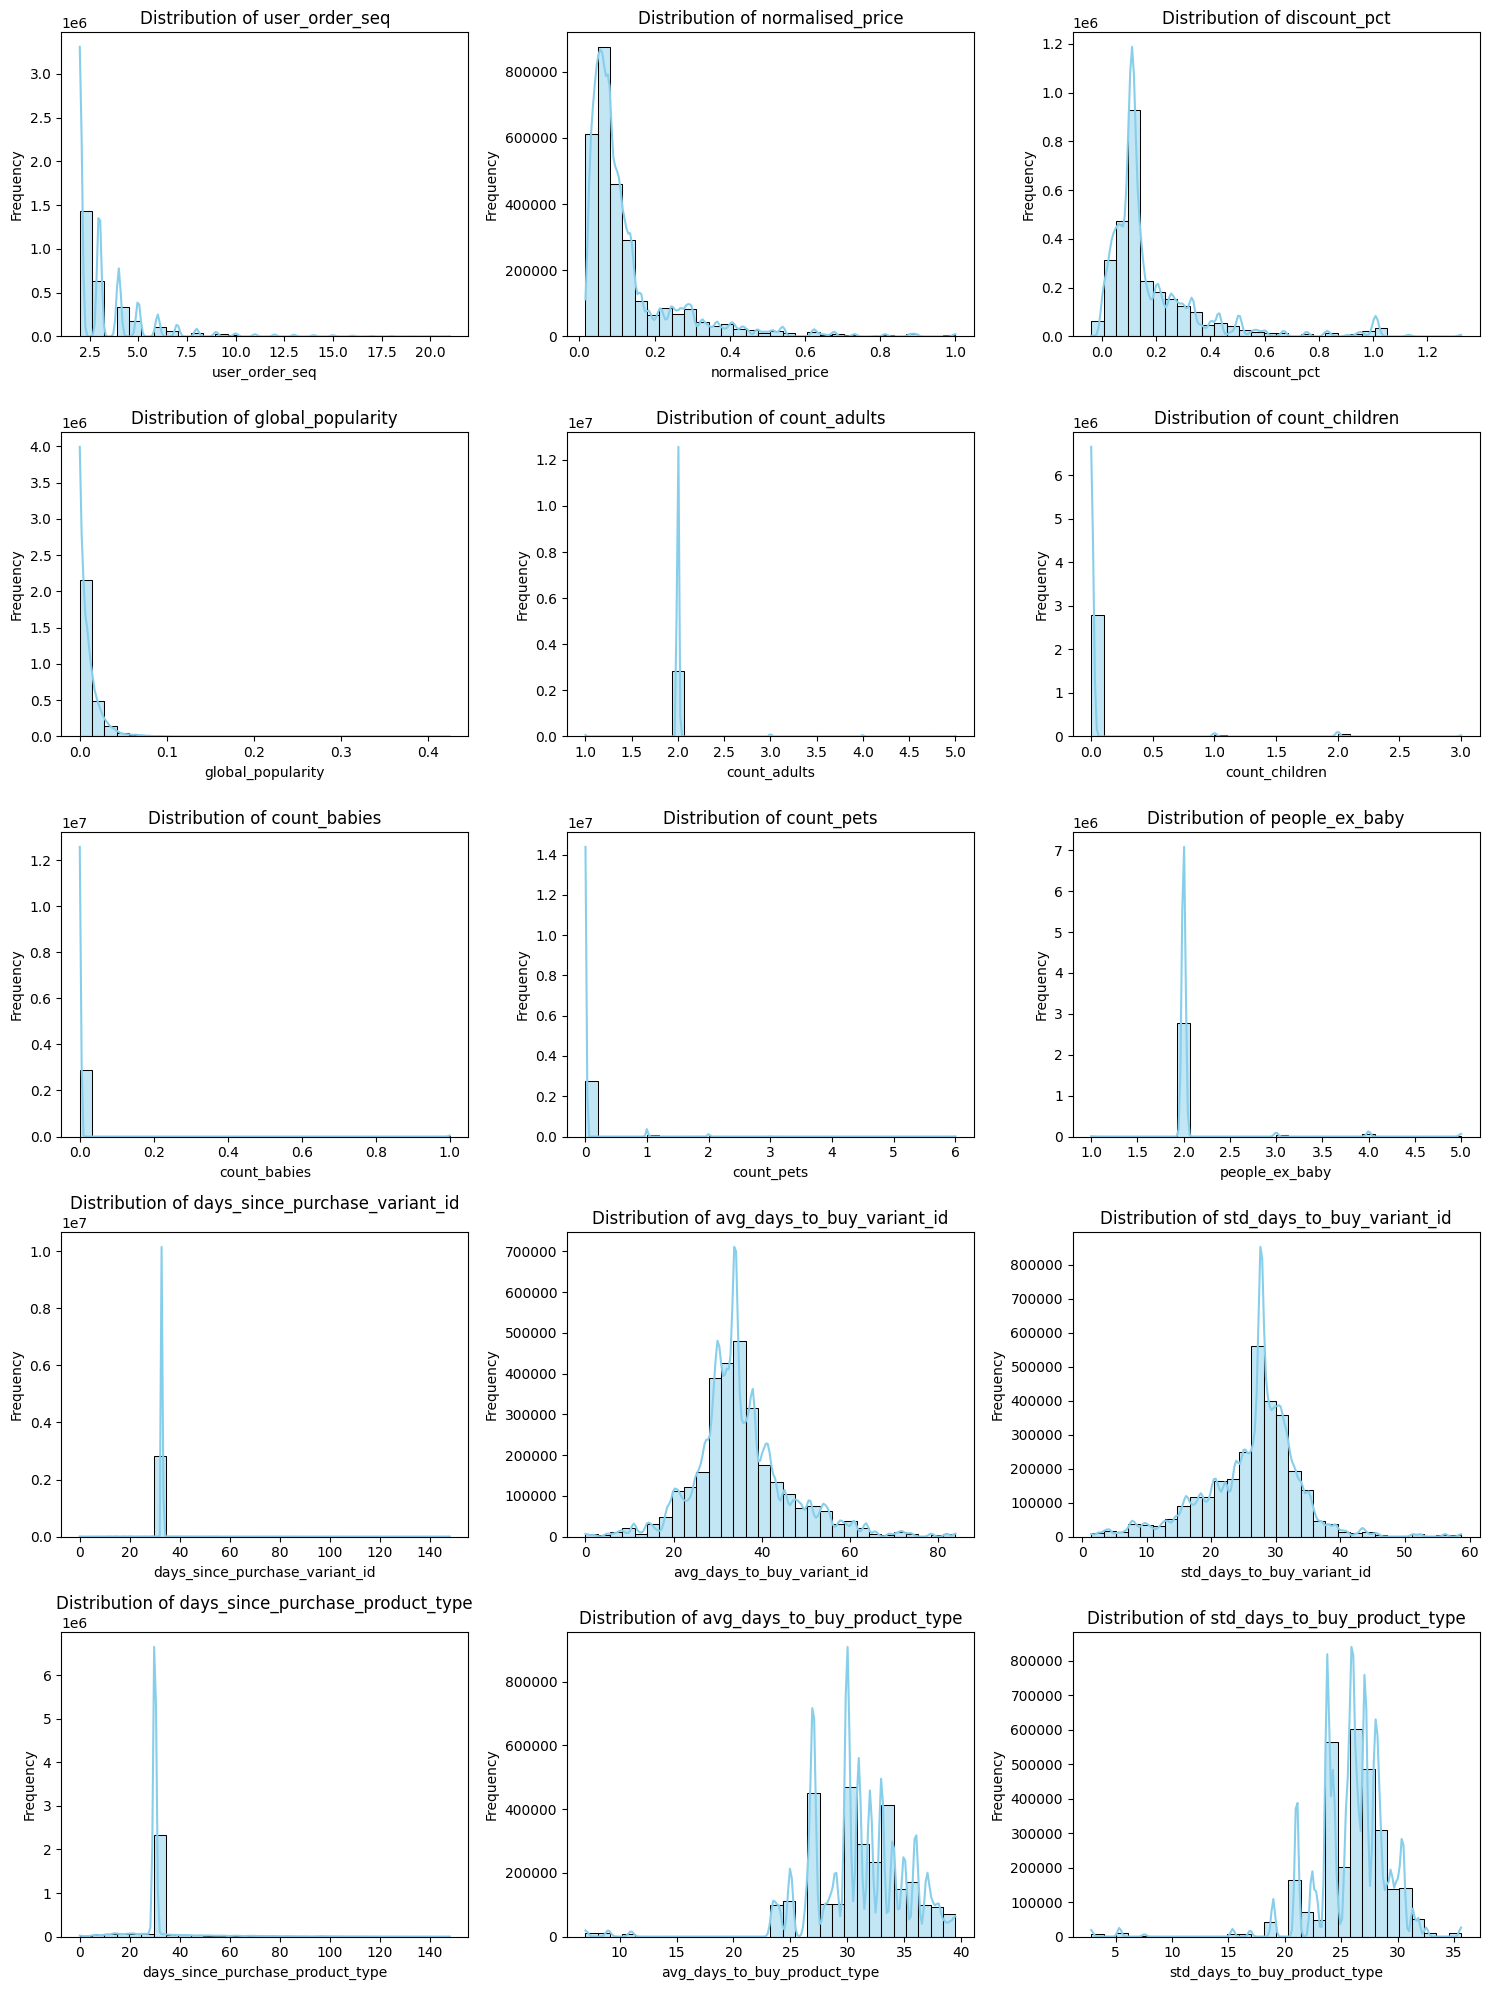

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cols = 3
rows = int(np.ceil(len(numerical_cols) / cols))

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(dataset[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Some peaks stand out in these distributions, suggesting that there has been an imputation of data to the median or mode on variables such as count_children, where we knew from the task 1 dataset that most of the data were missing.

Let's check the correlation of the numerical variables

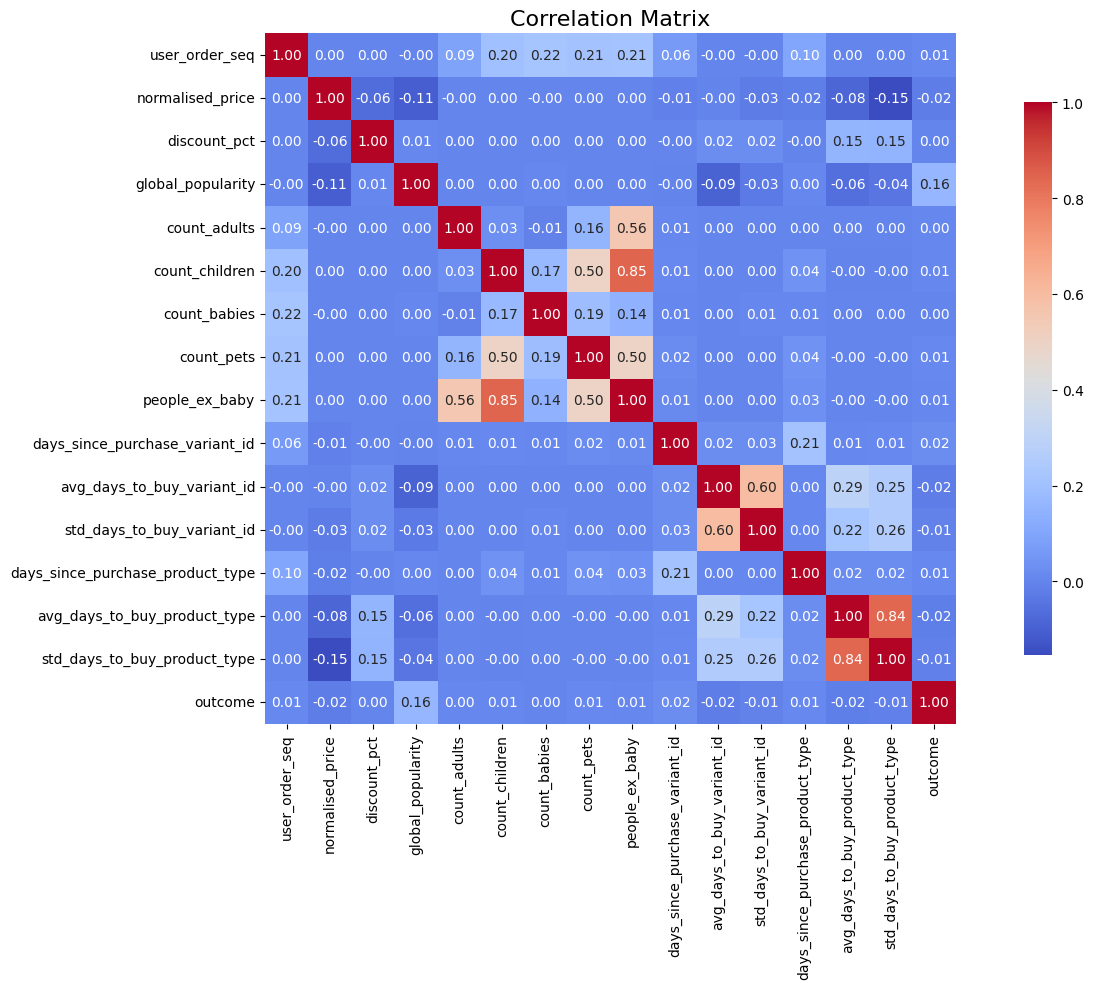

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr = dataset[numerical_cols + [label_col]].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

We found nothing outstanding in the correlation matrix, the variables are moderately correlated.